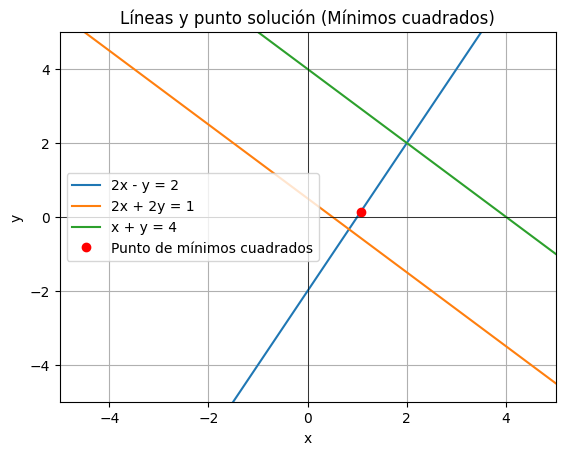

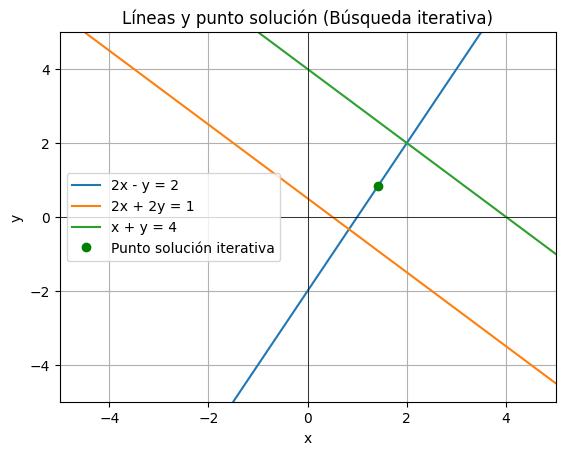

Punto solución de mínimos cuadrados: [1.06666667 0.13333333]
Punto solución de búsqueda iterativa: (np.float64(1.4199999999998631), np.float64(0.8299999999998757))
Distancia mínima en búsqueda iterativa: 1.7500057142763847


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (a): Método de mínimos cuadrados
# Definir el sistema de ecuaciones en forma de matriz
A = np.array([[2, -1],
              [2, 2],
              [1, 1]])
b = np.array([2, 1, 4])

# Solución de mínimos cuadrados
x_ls = np.linalg.inv(A.T @ A) @ A.T @ b

# Graficar las líneas y el punto solución
x_vals = np.linspace(-5, 5, 100)
line1 = (2 * x_vals - 2) / 1
line2 = (1 - 2 * x_vals) / 2
line3 = 4 - x_vals

plt.plot(x_vals, line1, label="2x - y = 2")
plt.plot(x_vals, line2, label="2x + 2y = 1")
plt.plot(x_vals, line3, label="x + y = 4")
plt.plot(x_ls[0], x_ls[1], 'ro', label="Punto de mínimos cuadrados")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.title("Líneas y punto solución (Mínimos cuadrados)")
plt.show()

# Parte (b): Búsqueda iterativa
h = 0.01
x_range = np.arange(-5, 5, h)
y_range = np.arange(-5, 5, h)
min_dist = float('inf')
best_point = None

# Función para calcular la distancia al cuadrado de un punto a una línea ax + by + c = 0
def distance_to_line(a, b, c, x, y):
    return (a * x + b * y + c) ** 2 / (a ** 2 + b ** 2)

# Coeficientes de las líneas
lines = [(2, -1, -2), (2, 2, -1), (1, 1, -4)]

# Búsqueda iterativa
for x in x_range:
    for y in y_range:
        dist = sum(distance_to_line(a, b, c, x, y) for a, b, c in lines)
        if dist < min_dist:
            min_dist = dist
            best_point = (x, y)

# Graficar el punto encontrado por la búsqueda iterativa
plt.plot(x_vals, line1, label="2x - y = 2")
plt.plot(x_vals, line2, label="2x + 2y = 1")
plt.plot(x_vals, line3, label="x + y = 4")
plt.plot(best_point[0], best_point[1], 'go', label="Punto solución iterativa")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.title("Líneas y punto solución (Búsqueda iterativa)")
plt.show()

# Comparación de resultados
print("Punto solución de mínimos cuadrados:", x_ls)
print("Punto solución de búsqueda iterativa:", best_point)
print("Distancia mínima en búsqueda iterativa:", np.sqrt(min_dist))


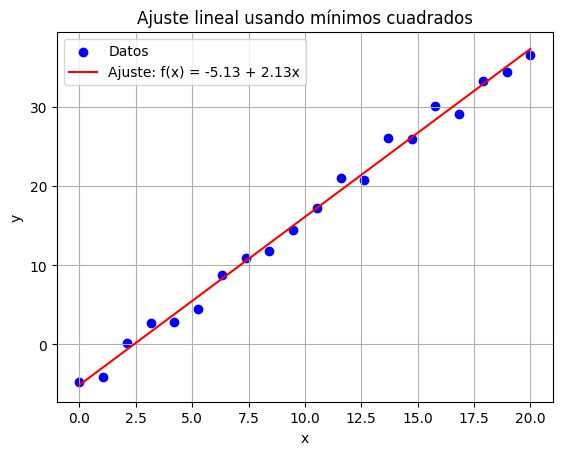

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests

# Paso 1: Descargar los datos y cargarlos en un arreglo
url = "https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosLineal.txt"
response = requests.get(url)
data = []

# Leer cada línea del archivo descargado y convertir a flotantes
for line in response.text.strip().split('\n'):
    try:
        x, y = map(float, line.split())
        data.append([x, y])
    except ValueError:
        print(f"Warning: Línea no válida encontrada y omitida: {line}")

# Convertir a array de numpy para facilidad de uso
data = np.array(data)
x_data = data[:, 0]
y_data = data[:, 1]

# Paso 2: Ajuste lineal usando mínimos cuadrados
A = np.vstack([np.ones(len(x_data)), x_data]).T
a0, a1 = np.linalg.lstsq(A, y_data, rcond=None)[0]

# Valores ajustados de f(x)
y_fit = a0 + a1 * x_data

# Paso 3: Graficar los datos y el ajuste
plt.scatter(x_data, y_data, color='blue', label='Datos')
plt.plot(x_data, y_fit, color='red', label=f'Ajuste: f(x) = {a0:.2f} + {a1:.2f}x')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Ajuste lineal usando mínimos cuadrados")
plt.grid(True)
plt.show()


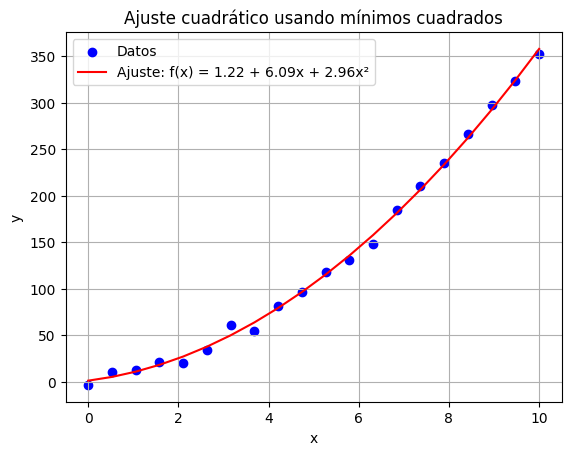

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import requests

# Paso 1: Descargar los datos
url = "https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosCuadratico.txt"
response = requests.get(url)
data = []

# Leer cada línea del archivo y convertir a flotantes
for line in response.text.strip().split('\n'):
    try:
        x, y = map(float, line.split())
        data.append([x, y])
    except ValueError:
        print(f"Warning: Línea no válida encontrada y omitida: {line}")

# Convertir a array de numpy
data = np.array(data)
x_data = data[:, 0]
y_data = data[:, 1]

# Paso 2: Ajuste cuadrático usando mínimos cuadrados
# Construir la matriz de diseño para el ajuste cuadrático
A = np.vstack([np.ones(len(x_data)), x_data, x_data**2]).T
a0, a1, a2 = np.linalg.lstsq(A, y_data, rcond=None)[0]

# Calcular los valores ajustados de f(x)
y_fit = a0 + a1 * x_data + a2 * x_data**2

# Paso 3: Graficar los datos y el ajuste
plt.scatter(x_data, y_data, color='blue', label='Datos')
plt.plot(x_data, y_fit, color='red', label=f'Ajuste: f(x) = {a0:.2f} + {a1:.2f}x + {a2:.2f}x²')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Ajuste cuadrático usando mínimos cuadrados")
plt.grid(True)
plt.show()


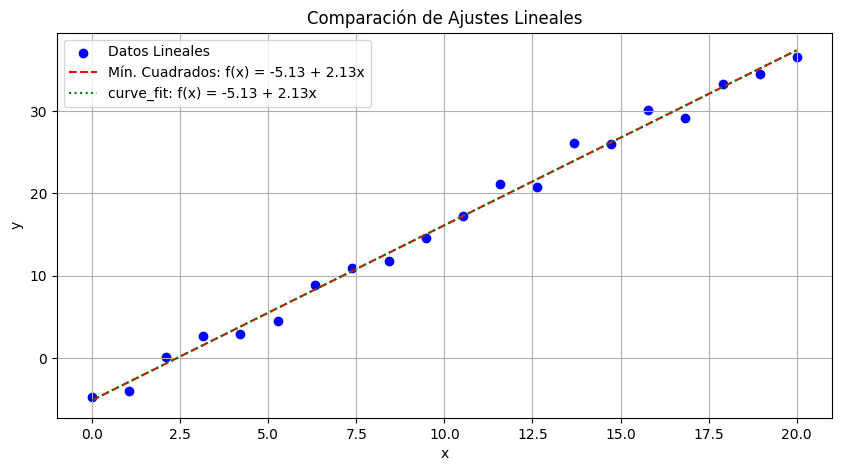

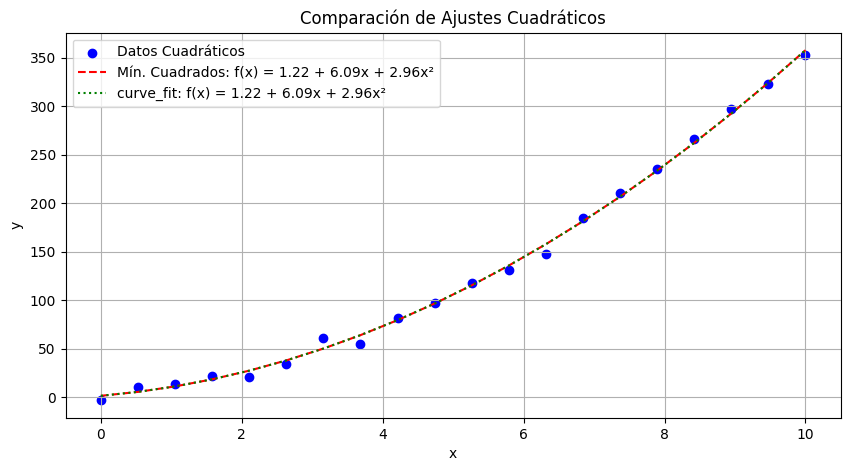

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import requests

# Paso 1: Descargar los datos y cargarlos en un arreglo
# Datos lineales
url_lineal = "https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosLineal.txt"
response_lineal = requests.get(url_lineal)
data_lineal = []

for line in response_lineal.text.strip().split('\n'):
    try:
        x, y = map(float, line.split())
        data_lineal.append([x, y])
    except ValueError:
        print(f"Warning: Línea no válida encontrada y omitida: {line}")

data_lineal = np.array(data_lineal)
x_lineal = data_lineal[:, 0]
y_lineal = data_lineal[:, 1]

# Datos cuadráticos
url_cuadratico = "https://github.com/asegura4488/Database/raw/main/MetodosComputacionalesReforma/MinimosCuadratico.txt"
response_cuadratico = requests.get(url_cuadratico)
data_cuadratico = []

for line in response_cuadratico.text.strip().split('\n'):
    try:
        x, y = map(float, line.split())
        data_cuadratico.append([x, y])
    except ValueError:
        print(f"Warning: Línea no válida encontrada y omitida: {line}")

data_cuadratico = np.array(data_cuadratico)
x_cuadratico = data_cuadratico[:, 0]
y_cuadratico = data_cuadratico[:, 1]

# Paso 2: Ajustes de mínimos cuadrados (Método anterior)

# Ajuste lineal
A_lineal = np.vstack([np.ones(len(x_lineal)), x_lineal]).T
a0_lineal, a1_lineal = np.linalg.lstsq(A_lineal, y_lineal, rcond=None)[0]
y_fit_lineal = a0_lineal + a1_lineal * x_lineal

# Ajuste cuadrático
A_cuadratico = np.vstack([np.ones(len(x_cuadratico)), x_cuadratico, x_cuadratico**2]).T
a0_cuadratico, a1_cuadratico, a2_cuadratico = np.linalg.lstsq(A_cuadratico, y_cuadratico, rcond=None)[0]
y_fit_cuadratico = a0_cuadratico + a1_cuadratico * x_cuadratico + a2_cuadratico * x_cuadratico**2

# Paso 3: Ajustes con `curve_fit`

# Definir funciones para `curve_fit`
def func_lineal(x, a0, a1):
    return a0 + a1 * x

def func_cuadratica(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

# Ajuste lineal usando `curve_fit`
params_lineal, _ = curve_fit(func_lineal, x_lineal, y_lineal)
y_fit_lineal_curvefit = func_lineal(x_lineal, *params_lineal)

# Ajuste cuadrático usando `curve_fit`
params_cuadratico, _ = curve_fit(func_cuadratica, x_cuadratico, y_cuadratico)
y_fit_cuadratico_curvefit = func_cuadratica(x_cuadratico, *params_cuadratico)

# Paso 4: Graficar y comparar

# Gráfica para el ajuste lineal
plt.figure(figsize=(10, 5))
plt.scatter(x_lineal, y_lineal, color='blue', label='Datos Lineales')
plt.plot(x_lineal, y_fit_lineal, color='red', linestyle='--', label=f'Mín. Cuadrados: f(x) = {a0_lineal:.2f} + {a1_lineal:.2f}x')
plt.plot(x_lineal, y_fit_lineal_curvefit, color='green', linestyle=':', label=f'curve_fit: f(x) = {params_lineal[0]:.2f} + {params_lineal[1]:.2f}x')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparación de Ajustes Lineales")
plt.grid(True)
plt.show()

# Gráfica para el ajuste cuadrático
plt.figure(figsize=(10, 5))
plt.scatter(x_cuadratico, y_cuadratico, color='blue', label='Datos Cuadráticos')
plt.plot(x_cuadratico, y_fit_cuadratico, color='red', linestyle='--', label=f'Mín. Cuadrados: f(x) = {a0_cuadratico:.2f} + {a1_cuadratico:.2f}x + {a2_cuadratico:.2f}x²')
plt.plot(x_cuadratico, y_fit_cuadratico_curvefit, color='green', linestyle=':', label=f'curve_fit: f(x) = {params_cuadratico[0]:.2f} + {params_cuadratico[1]:.2f}x + {params_cuadratico[2]:.2f}x²')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparación de Ajustes Cuadráticos")
plt.grid(True)
plt.show()




# Sección 1
 "1. Minimización de χ² para un Modelo Lineal"

Para un modelo lineal de la forma f(x) = a₀ + a₁x, la función de costo χ² se define como:

χ²(a₀, a₁) = Σᵢ=1ⁿ (yᵢ - (a₀ + a₁xᵢ))²

Expandiendo el cuadrado, tenemos:

χ²(a₀, a₁) = Σᵢ=1ⁿ (yᵢ² - 2yᵢ(a₀ + a₁xᵢ) + (a₀ + a₁xᵢ)²)

Para minimizar esta función de costo, derivamos con respecto a a₀ y a₁, y establecemos las derivadas parciales igual a cero.


# Derivadas parciales y solución para a₀ y a₁
Derivadas parciales

1. Con respecto a a₀:

∂χ²/∂a₀ = -2 Σᵢ=1ⁿ (yᵢ - a₀ - a₁xᵢ) = 0

Esto implica:

Σᵢ=1ⁿ yᵢ = n a₀ + a₁ Σᵢ=1ⁿ xᵢ

Dividiendo entre n, obtenemos:

a₀ = ȳ - a₁ x̄

2. Con respecto a a₁:

∂χ²/∂a₁ = -2 Σᵢ=1ⁿ xᵢ (yᵢ - a₀ - a₁ xᵢ) = 0

Esto implica:

Σᵢ=1ⁿ xᵢ yᵢ = a₀ Σᵢ=1ⁿ xᵢ + a₁ Σᵢ=1ⁿ xᵢ²

Sustituyendo a₀ de la ecuación anterior y simplificando, obtenemos:

a₁ = (Σ xᵢ yᵢ - Σ xᵢ Σ yᵢ / n) / (Σ xᵢ² - (Σ xᵢ)² / n)


# Sección 2
 "2. Minimización de χ² para un Modelo Cuadrático"
Para un modelo cuadrático de la forma f(x) = a₀ + a₁ x + a₂ x², la función de costo χ² es:

χ²(a₀, a₁, a₂) = Σᵢ=1ⁿ (yᵢ - (a₀ + a₁ xᵢ + a₂ xᵢ²))²

Expandiendo y derivando con respecto a a₀, a₁, y a₂, obtenemos un sistema de ecuaciones al igualar a cero las derivadas parciales.

# Sistema de Ecuaciones

Sistema de Ecuaciones

1. Con respecto a a₀:

Σᵢ=1ⁿ (yᵢ - a₀ - a₁ xᵢ - a₂ xᵢ²) = 0

Esto nos da:

n a₀ + a₁ Σᵢ=1ⁿ xᵢ + a₂ Σᵢ=1ⁿ xᵢ² = Σᵢ=1ⁿ yᵢ

2. Con respecto a a₁:

Σᵢ=1ⁿ xᵢ (yᵢ - a₀ - a₁ xᵢ - a₂ xᵢ²) = 0

Esto nos da:

a₀ Σᵢ=1ⁿ xᵢ + a₁ Σᵢ=1ⁿ xᵢ² + a₂ Σᵢ=1ⁿ xᵢ³ = Σᵢ=1ⁿ xᵢ yᵢ

3. Con respecto a a₂:

Σᵢ=1ⁿ xᵢ² (yᵢ - a₀ - a₁ xᵢ - a₂ xᵢ²) = 0

Esto nos da:

a₀ Σᵢ=1ⁿ xᵢ² + a₁ Σᵢ=1ⁿ xᵢ³ + a₂ Σᵢ=1ⁿ xᵢ⁴ = Σᵢ=1ⁿ xᵢ² yᵢ

El sistema resultante es:

n a₀ + a₁ Σ xᵢ + a₂ Σ xᵢ² = Σ yᵢ
a₀ Σ xᵢ + a₁ Σ xᵢ² + a₂ Σ xᵢ³ = Σ xᵢ yᵢ
a₀ Σ xᵢ² + a₁ Σ xᵢ³ + a₂ Σ xᵢ⁴ = Σ xᵢ² yᵢ

# Observación final

El sistema obtenido es simétrico, lo que sugiere una estructura conveniente para su resolución, y es propio de un ajuste cuadrático en mínimos cuadrados. Esta simetría simplifica su resolución en ciertos algoritmos, como el de eliminación gaussiana o métodos matriciales directos.


In [10]:
import numpy as np

# Definición de los vectores y la matriz A
b = np.array([-3, -3, 8, 9])
u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])
A = np.column_stack((u1, u2, u3))

# Parte a) Proyección usando mínimos cuadrados matriciales
x_ls = np.linalg.inv(A.T @ A) @ A.T @ b
proj_a = A @ x_ls

print("Proyección usando mínimos cuadrados matriciales:", proj_a)

# Parte b) Proyección usando el proceso de Gram-Schmidt
def gram_schmidt(vectors):
    orthogonal_basis = []
    for v in vectors:
        for u in orthogonal_basis:
            v = v - np.dot(v, u) / np.dot(u, u) * u
        orthogonal_basis.append(v)
    return orthogonal_basis

# Ortogonalización de u1, u2, u3
orthogonal_basis = gram_schmidt([u1, u2, u3])

# Normalización para obtener la base ortonormal
orthonormal_basis = [v / np.linalg.norm(v) for v in orthogonal_basis]

# Cálculo de los coeficientes ci = <b, vi>
c = [np.dot(b, v) for v in orthonormal_basis]

# Cálculo de la proyección
proj_b = sum(ci * vi for ci, vi in zip(c, orthonormal_basis))

print("Proyección usando base ortonormal (Gram-Schmidt):", proj_b)


Proyección usando mínimos cuadrados matriciales: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  6.66133815e-16]
Proyección usando base ortonormal (Gram-Schmidt): [-2.00000000e+00  3.00000000e+00  4.00000000e+00 -1.11022302e-16]
